In [1]:
%pylab inline

import pandas as pd
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
dir_path = Path("/media/joshua/Milano/Lensing_Sim_Data/dev_90000")

df_meta = pd.read_csv(f"{dir_path}/metadata.csv")
print(df_meta.shape)

df_meta['img_name'] = df_meta['img_path'].str[-13:]
print(df_meta.shape)

df_meta.head(2)

(90000, 19)
(90000, 20)


,img_path,theta_E,gamma,center_x,center_y,e1,e2,gamma_ext,psi_ext,source_x,source_y,source_n_sersic,source_R_sersic,sersic_source_e1,sersic_source_e2,lens_light_n_sersic,lens_light_R_sersic,num_quasars,sigma_bkg,img_name
0,/content/drive/MyDrive/Lensing_Sim_Data/dev_1w...,1.250506,2.113448,0.012731,0.019534,0.329004,0.202799,0.001342,0.698057,-0.027962,0.147111,0.520356,0.206155,0.0,0.5,4.205977,1.032043,4.0,3.668884,X_0000000.npy
1,/content/drive/MyDrive/Lensing_Sim_Data/dev_1w...,1.611301,1.850000,0.013463,0.016337,-0.301861,-0.200725,0.001430,3.804697,-0.138047,0.021291,0.466268,0.209827,0.0,0.5,4.068642,0.937598,4.0,3.224370,X_0000001.npy


In [3]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_meta, random_state=42, test_size=0.2)


df_test.shape

(18000, 20)

In [7]:
# df_train.to_csv(f"{dir_path}/metadata_train.csv", index=False)
# df_test.to_csv(f"{dir_path}/metadata_test.csv", index=False)

In [3]:
# There are 6 kinds of psf sorted by order, aka psf1: 0-4999, psf2: 5000-9999, etc.
n_chunks = 6
df_chunks = np.array_split(df_meta, n_chunks)

random_state = 0
test_size = 0.1
df_test_list = []
df_train_list = []

print(f"Split into {n_chunks} dfs\n")
for i in range(n_chunks):
    print(f"index of the chunk {i} = {df_chunks[i].index}")
    
    _df_train, _df_test = train_test_split(df_chunks[i], test_size=test_size, random_state=random_state)
    df_train_list.append(_df_train)
    df_test_list.append(_df_test)
    print(f"    train samples = {_df_train.shape[0]}")
    print(f"    test samples = {_df_test.shape[0]}\n")
    

print("Concatenate the chunks")
df_train = pd.concat(df_train_list)
df_test = pd.concat(df_test_list)

Split into 6 dfs

index of the chunk 0 = RangeIndex(start=0, stop=5000, step=1)
    train samples = 4500
    test samples = 500

index of the chunk 1 = RangeIndex(start=5000, stop=10000, step=1)
    train samples = 4500
    test samples = 500

index of the chunk 2 = RangeIndex(start=10000, stop=15000, step=1)
    train samples = 4500
    test samples = 500

index of the chunk 3 = RangeIndex(start=15000, stop=20000, step=1)
    train samples = 4500
    test samples = 500

index of the chunk 4 = RangeIndex(start=20000, stop=25000, step=1)
    train samples = 4500
    test samples = 500

index of the chunk 5 = RangeIndex(start=25000, stop=30000, step=1)
    train samples = 4500
    test samples = 500

Concatenate the chunks


In [4]:
print(df_train.shape)
df_train.head(2)

(27000, 19)


,img_path,theta_E,gamma,center_x,center_y,e1,e2,gamma_ext,psi_ext,source_x,source_y,source_n_sersic,source_R_sersic,sersic_source_e1,sersic_source_e2,lens_light_n_sersic,lens_light_R_sersic,num_quasars,img_name
3871,/content/drive/MyDrive/Lensing_Sim_Data/dev_25...,0.521307,1.909936,0.014114,0.020525,0.111568,-0.275598,0.016769,5.187581,0.025415,0.105289,0.588953,0.193083,0.0,0.5,4.028350,1.041602,4.0,X_0003871.npy
4299,/content/drive/MyDrive/Lensing_Sim_Data/dev_25...,1.043719,1.940070,-0.037605,0.021722,-0.116751,-0.128374,0.020548,5.340180,0.053667,0.061011,0.482308,0.209824,0.0,0.5,3.864536,0.991467,4.0,X_0004299.npy


In [5]:
print(df_test.shape)
df_test.head(2)

(3000, 19)


,img_path,theta_E,gamma,center_x,center_y,e1,e2,gamma_ext,psi_ext,source_x,source_y,source_n_sersic,source_R_sersic,sersic_source_e1,sersic_source_e2,lens_light_n_sersic,lens_light_R_sersic,num_quasars,img_name
398,/content/drive/MyDrive/Lensing_Sim_Data/dev_25...,1.372771,2.028347,0.015123,0.023262,0.127864,-0.070566,0.013856,2.766934,-0.117461,-0.076908,0.502954,0.201018,0.0,0.5,4.234450,0.927794,2.0,X_0000398.npy
3833,/content/drive/MyDrive/Lensing_Sim_Data/dev_25...,0.619912,2.028633,0.004177,-0.022132,0.301019,-0.237736,0.023590,0.458588,-0.032704,-0.060639,0.530509,0.202213,0.0,0.5,3.914122,0.995293,4.0,X_0003833.npy


In [6]:
df_train.to_csv(f"{dir_path}/metadata_train.csv", index=False)
df_test.to_csv(f"{dir_path}/metadata_test.csv", index=False)

In [4]:
target_cols = [key for key in df_train.keys() if key not in ["img_path", "num_quasars", "img_name"]]
print(target_cols)

['theta_E', 'gamma', 'center_x', 'center_y', 'e1', 'e2', 'gamma_ext', 'psi_ext', 'source_x', 'source_y', 'source_n_sersic', 'source_R_sersic', 'sersic_source_e1', 'sersic_source_e2', 'lens_light_n_sersic', 'lens_light_R_sersic', 'sigma_bkg']


In [5]:
def plot_target_distribution(df):
    
    sns.set(style="white", color_codes=True, font_scale=1)
    fig, ax = plt.subplots(2, 4, figsize=(14, 7))


    ax[0, 0].hist(df["theta_E"])
    ax[0, 0].set_title("theta_E")

    ax[0, 1].hist(df["gamma"])
    ax[0, 1].set_title("gamma")

    ax[0, 2].hist(df["center_x"])
    ax[0, 2].set_title("center_x")

    ax[0, 3].hist(df["center_y"])
    ax[0, 3].set_title("center_y")

    ax[1, 0].hist(df["e1"])
    ax[1, 0].set_title("e1")

    ax[1, 1].hist(df["e2"])
    ax[1, 1].set_title("e2")

    ax[1, 2].hist(df["lens_light_R_sersic"])
    ax[1, 2].set_title("lens_light_R_sersic")

    ax[1, 3].hist(df["lens_light_n_sersic"])
    ax[1, 3].set_title("lens_light_n_sersic")

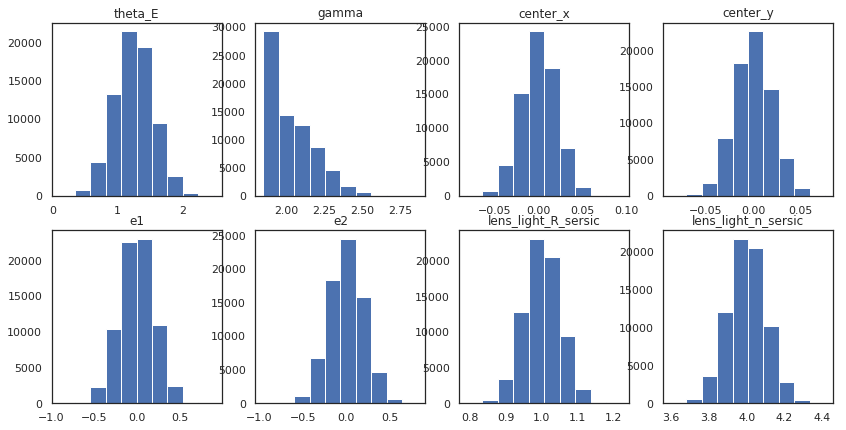

In [6]:
plot_target_distribution(df_train)

In [7]:
for target in target_cols:
    
    ymin = df_train[target].min()
    ymax = df_train[target].max()
    dy = ymax - ymin
    
    print(f"{target}:")
    print(f"    min = {ymin:.2f}, max = {ymax:.2f}, max - min = {dy:.2f}")
    
    if dy == 0:
        print("    !!!! max - min == 0 !!!!")
    
    print(" ")

theta_E:
    min = 0.10, max = 2.49, max - min = 2.39
 
gamma:
    min = 1.85, max = 2.86, max - min = 1.01
 
center_x:
    min = -0.08, max = 0.09, max - min = 0.18
 
center_y:
    min = -0.09, max = 0.08, max - min = 0.16
 
e1:
    min = -0.91, max = 0.90, max - min = 1.81
 
e2:
    min = -0.95, max = 0.82, max - min = 1.77
 
gamma_ext:
    min = 0.00, max = 0.04, max - min = 0.04
 
psi_ext:
    min = 0.00, max = 6.28, max - min = 6.28
 
source_x:
    min = -0.43, max = 0.42, max - min = 0.85
 
source_y:
    min = -0.42, max = 0.42, max - min = 0.84
 
source_n_sersic:
    min = 0.29, max = 0.70, max - min = 0.41
 
source_R_sersic:
    min = 0.16, max = 0.24, max - min = 0.09
 
sersic_source_e1:
    min = 0.00, max = 0.00, max - min = 0.00
    !!!! max - min == 0 !!!!
 
sersic_source_e2:
    min = 0.50, max = 0.50, max - min = 0.00
    !!!! max - min == 0 !!!!
 
lens_light_n_sersic:
    min = 3.60, max = 4.42, max - min = 0.82
 
lens_light_R_sersic:
    min = 0.79, max = 1.22, max - m

In [8]:
from sklearn.preprocessing import StandardScaler


df_train_scaled = df_train.copy()

scaler = StandardScaler()
scaler.fit(df_train_scaled[target_cols])

df_train_scaled[target_cols] = scaler.transform(df_train_scaled[target_cols])

df_train_scaled.head(2)

,img_path,theta_E,gamma,center_x,center_y,e1,e2,gamma_ext,psi_ext,source_x,source_y,source_n_sersic,source_R_sersic,sersic_source_e1,sersic_source_e2,lens_light_n_sersic,lens_light_R_sersic,num_quasars,sigma_bkg,img_name
51004,/content/drive/MyDrive/Lensing_Sim_Data/dev_1w...,0.774630,1.160691,1.057831,0.302114,0.016975,-0.570275,0.552303,0.541554,-0.599408,0.897901,-1.285554,1.263723,0.0,0.0,-1.125120,-0.625523,4.0,-0.833838,X_0051004.npy
11453,/content/drive/MyDrive/Lensing_Sim_Data/dev_1w...,-1.234768,0.170739,0.702615,-1.149603,-1.396700,-0.313422,0.593288,-0.030286,0.238689,-0.867598,0.196053,1.204986,0.0,0.0,0.627873,-0.196463,4.0,1.327605,X_0011453.npy


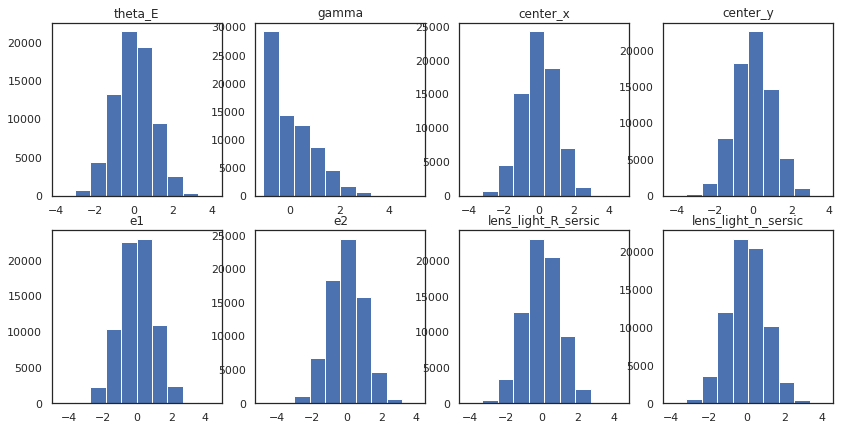

In [9]:
plot_target_distribution(df_train_scaled)

In [10]:
df_test_scaled = df_test.copy()
df_test_scaled[target_cols] = scaler.transform(df_test_scaled[target_cols])

df_test_scaled.head(2)

,img_path,theta_E,gamma,center_x,center_y,e1,e2,gamma_ext,psi_ext,source_x,source_y,source_n_sersic,source_R_sersic,sersic_source_e1,sersic_source_e2,lens_light_n_sersic,lens_light_R_sersic,num_quasars,sigma_bkg,img_name
89610,/content/drive/MyDrive/Lensing_Sim_Data/dev_1w...,-0.558108,0.484941,-0.898459,0.472463,-0.977271,-0.433376,-0.653247,-1.119894,-1.594700,1.653474,-0.086283,-0.201656,0.0,0.0,-0.244801,-0.694643,2.0,1.049744,X_0089610.npy
12456,/content/drive/MyDrive/Lensing_Sim_Data/dev_1w...,0.492376,0.412041,-1.017724,-0.026733,1.144020,0.868908,-1.195456,0.285883,-0.646822,0.917923,1.398630,1.039560,0.0,0.0,-0.670003,0.389232,4.0,-1.518381,X_0012456.npy


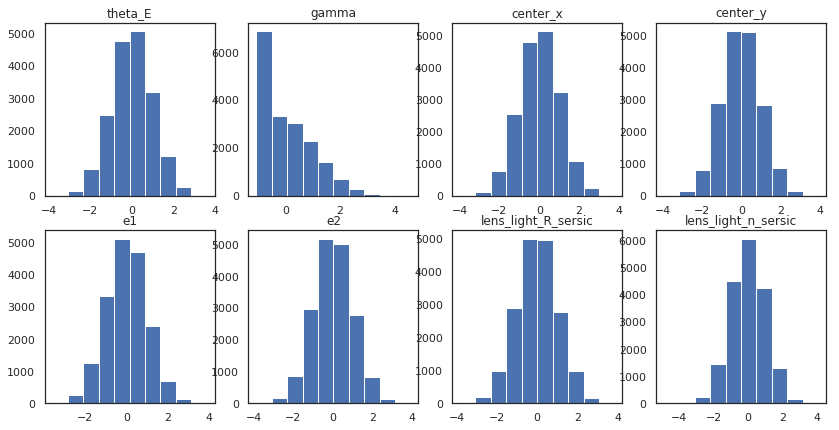

In [12]:
plot_target_distribution(df_test_scaled)

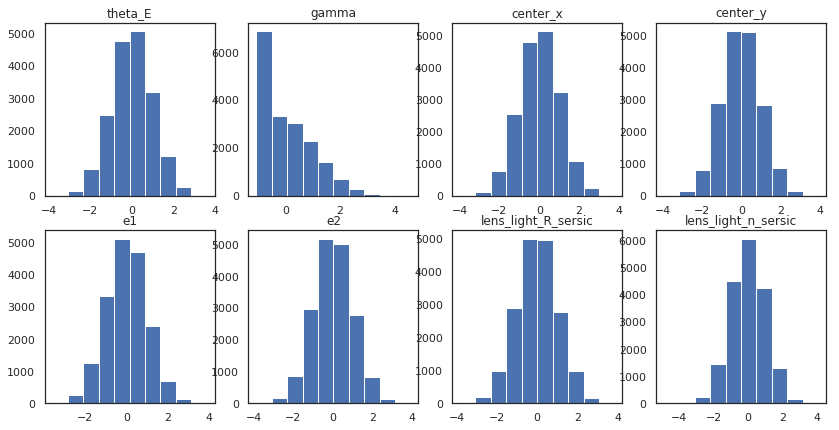

In [13]:
plot_target_distribution(df_test_scaled)

In [14]:
df_train_scaled.to_csv(f"{dir_path}/metadata_train_scaled.csv", index=False)
df_test_scaled.to_csv(f"{dir_path}/metadata_test_scaled.csv", index=False)

In [15]:
from pickle import dump

dump(scaler, open(f"{dir_path}/scaler.pkl", "wb"))

In [18]:
# from pickle import load

# scaler = load(open(f"{dir_path}/scaler.pkl", 'rb'))